In [1]:
%matplotlib inline

In [2]:
import numpy as np
from math import *
from pylab import *
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['ytick.major.pad'] = 8

In [4]:
# Generic Gaussian
def gaussian(x, mu, sigma):
    return exp(-pow(x-mu, 2.0)/2.0/sigma/sigma)/sqrt(2.0*np.pi)/sigma

# energy_flux_power_law:
#   Returns a power-law flux phi, multiplied by E^2, i.e., E^2*phi
def energy_flux_power_law(energy_nu, phi0, gamma, energy_nu_norm):
    flux = phi0*pow(energy_nu/energy_nu_norm, 2.0-gamma)
    return flux

# energy_flux_power_law_dip
#   Returns a power-law flux with a Gaussian dip centered around energy Eres, amplitude amp, and width sigma
def energy_flux_power_law_dip(energy_nu, phi0, gamma, energy_nu_norm, Eres, amp, sigma):
    flux = energy_flux_power_law(energy_nu, phi0, gamma, energy_nu_norm)
    flux = flux*(1.0-amp*gaussian(energy_nu, Eres, sigma))
    return flux
    
# energy_flux_power_law_bump
#   Returns a power-law flux with a Gaussian bump centered around energy Eres, amplitude amp, and width sigma
def energy_flux_power_law_bump(energy_nu, phi0, gamma, energy_nu_norm, Eres, amp, sigma):
    flux = energy_flux_power_law(energy_nu, phi0, gamma, energy_nu_norm)
    flux = flux*(1.0+amp*gaussian(energy_nu, Eres, sigma))
    return flux

# energy_flux_power_law_sigmoid
#   Returns a power-law flux with a sigmoid function
def energy_flux_power_law_sigmoid(energy_nu, phi0, gamma, energy_nu_norm, fraction_depletion, growth_rate,
    energy_nu_trans):
    K = energy_flux_power_law(energy_nu, phi0, gamma, energy_nu_norm)
    A = fraction_depletion*K
    flux = K-A
    flux = flux/(1.0+exp(-growth_rate*(energy_nu-energy_nu_trans)))
    flux = flux + A
    return flux

In [5]:
log10_energy_nu_min = 3.0
log10_energy_nu_max = 7.0
log10_energy_nu_npts = 1000
energy_nu_grid \
    = np.power(10.0, np.linspace(log10_energy_nu_min, log10_energy_nu_max, log10_energy_nu_npts)) # [GeV]

**Example of flux with dips**
Mimics the flux expected from secret neutrino interactions, neutrino-dark matter interactions
Free parameters to vary when testing sensitivity: Eres, amp, sigma
(Can choose to keep phi0, gamma, energy_nu_norm fixed for simplicity)

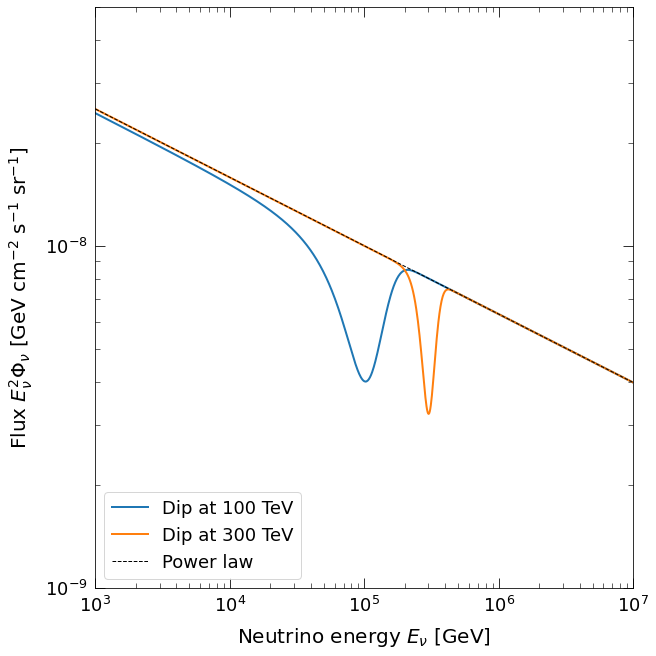

In [6]:
phi0 = 1.e-8 # [GeV cm^{-2} s^{-1} sr^{-1}]
gamma = 2.2
energy_nu_norm = 1.e5 #[GeV]
amp = 6.e4
sigma = 4.e4 # [GeV]
Eres_1 = 1.e5 # [GeV]
Eres_2 = 3.e5 # [GeV]

energy_flux_power_law_grid \
    = [energy_flux_power_law(x, phi0, gamma, energy_nu_norm) for x in energy_nu_grid]
energy_flux_power_law_dip_grid_1 \
    = [energy_flux_power_law_dip(x, phi0, gamma, energy_nu_norm, Eres_1, amp, sigma) for x in energy_nu_grid]
energy_flux_power_law_dip_grid_2 \
    = [energy_flux_power_law_dip(x, phi0, gamma, energy_nu_norm, Eres_2, amp, sigma) for x in energy_nu_grid]

fig, ax = plt.subplots(constrained_layout=True, figsize=[9,9])

ax.plot(energy_nu_grid, energy_flux_power_law_dip_grid_1, 
    ls='-', lw=2.0, c='C0', label=r'Dip at 100 TeV')
ax.plot(energy_nu_grid, energy_flux_power_law_dip_grid_2, 
    ls='-', lw=2.0, c='C1', label=r'Dip at 300 TeV')
ax.plot(energy_nu_grid, energy_flux_power_law_grid, 
    ls='--', lw=1.0, c='k', label=r'Power law')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(min(energy_nu_grid), max(energy_nu_grid))
ax.set_ylim(1.e-9, 5.e-8)
ax.set_xlabel(r'Neutrino energy $E_\nu$ [GeV]', 
    labelpad=10, size=20)
ax.set_ylabel( r'Flux $E_\nu^2 \Phi_\nu$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]', 
    labelpad=10, size=20)
ax.legend(loc='lower left', ncol=1, fontsize=18)

plt.show()

**Example of flux with bumps**
Mimics the flux from the decay of dark matter
Free parameters to vary when testing sensitivity: Eres, amp, sigma
(Can choose to keep phi0, gamma, energy_nu_norm fixed for simplicity)

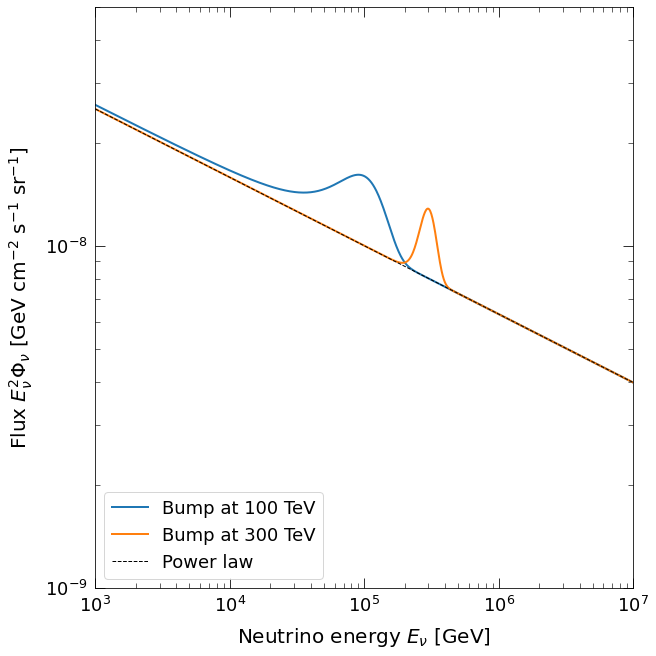

In [7]:
phi0 = 1.e-8 # [GeV cm^{-2} s^{-1} sr^{-1}]
gamma = 2.2
energy_nu_norm = 1.e5 #[GeV]
amp = 6.e4
sigma = 4.e4 # [GeV]
Eres_1 = 1.e5 # [GeV]
Eres_2 = 3.e5 # [GeV]

energy_flux_power_law_grid \
    = [energy_flux_power_law(x, phi0, gamma, energy_nu_norm) for x in energy_nu_grid]
energy_flux_power_law_bump_grid_1 \
    = [energy_flux_power_law_bump(x, phi0, gamma, energy_nu_norm, Eres_1, amp, sigma) for x in energy_nu_grid]
energy_flux_power_law_bump_grid_2 \
    = [energy_flux_power_law_bump(x, phi0, gamma, energy_nu_norm, Eres_2, amp, sigma) for x in energy_nu_grid]

fig, ax = plt.subplots(constrained_layout=True, figsize=[9,9])

ax.plot(energy_nu_grid, energy_flux_power_law_bump_grid_1, 
    ls='-', lw=2.0, c='C0', label=r'Bump at 100 TeV')
ax.plot(energy_nu_grid, energy_flux_power_law_bump_grid_2, 
    ls='-', lw=2.0, c='C1', label=r'Bump at 300 TeV')
ax.plot(energy_nu_grid, energy_flux_power_law_grid, 
    ls='--', lw=1.0, c='k', label=r'Power law')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(min(energy_nu_grid), max(energy_nu_grid))
ax.set_ylim(1.e-9, 5.e-8)
ax.set_xlabel(r'Neutrino energy $E_\nu$ [GeV]', 
    labelpad=10, size=20)
ax.set_ylabel( r'Flux $E_\nu^2 \Phi_\nu$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]', 
    labelpad=10, size=20)
ax.legend(loc='lower left', ncol=1, fontsize=18)

plt.show()

**Example of flux with sigmoidal transition**
Mimics the flux from neutrino decay (no decay at high energy transitions into decay at low energies
Free parameters to vary when testing sensitivity: fraction_depletion, growth_rate, energy_nu_trans
(Can choose to keep phi0, gamma, energy_nu_norm fixed for simplicity)

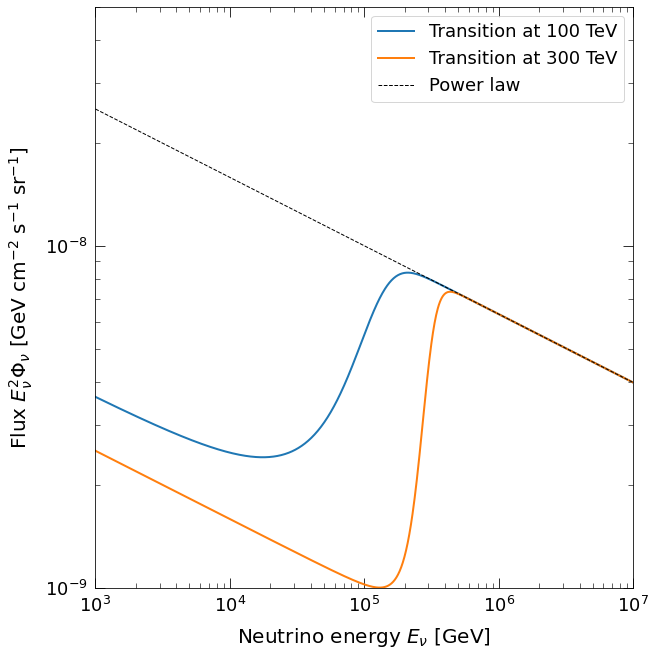

In [8]:
phi0 = 1.e-8 # [GeV cm^{-2} s^{-1} sr^{-1}]
gamma = 2.2
energy_nu_norm = 1.e5 #[GeV]
fraction_depletion = 0.1
growth_rate = 3.e-5
energy_nu_trans_1 = 1.e5 #[GeV]
energy_nu_trans_2 = 3.e5 #[GeV]

energy_flux_power_law_grid \
    = [energy_flux_power_law(x, phi0, gamma, energy_nu_norm) for x in energy_nu_grid]
energy_flux_power_law_sigmoid_grid_1 \
    = [energy_flux_power_law_sigmoid(x, phi0, gamma, energy_nu_norm, fraction_depletion, growth_rate,
        energy_nu_trans_1) for x in energy_nu_grid]
energy_flux_power_law_sigmoid_grid_2 \
    = [energy_flux_power_law_sigmoid(x, phi0, gamma, energy_nu_norm, fraction_depletion, growth_rate,
        energy_nu_trans_2) for x in energy_nu_grid]

fig, ax = plt.subplots(constrained_layout=True, figsize=[9,9])

ax.plot(energy_nu_grid, energy_flux_power_law_sigmoid_grid_1, 
    ls='-', lw=2.0, c='C0', label=r'Transition at 100 TeV')
ax.plot(energy_nu_grid, energy_flux_power_law_sigmoid_grid_2, 
    ls='-', lw=2.0, c='C1', label=r'Transition at 300 TeV')
ax.plot(energy_nu_grid, energy_flux_power_law_grid, 
    ls='--', lw=1.0, c='k', label=r'Power law')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(min(energy_nu_grid), max(energy_nu_grid))
ax.set_ylim(1.e-9, 5.e-8)
ax.set_xlabel(r'Neutrino energy $E_\nu$ [GeV]', 
    labelpad=10, size=20)
ax.set_ylabel( r'Flux $E_\nu^2 \Phi_\nu$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]', 
    labelpad=10, size=20)
ax.legend(loc='upper right', ncol=1, fontsize=18)

plt.show()